In [1]:
# Changing Working Directory
import os
os.chdir('..//..')
os.getcwd()

'c:\\Users\\hadas-stud-group2\\Documents\\GitHub\\neural_cstg'

In [2]:
# Importing
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as spio
from GaligoolAngel.utils import vector_to_symmetric_matrix

In [3]:
# Loading Results
path_animal_1 = 'C://Users//hadas-stud-group2//Documents//GitHub//results//animal_1_comp_3//c-stg_hidden[100]_lr0.0001_lam0.1_Final_check.mat'
path_animal_2 = 'C://Users//hadas-stud-group2//Documents//GitHub//results//animal_2_comp_5//c-stg_hidden[10, 300]_lr0.0005_lam0.1_lay[200, 100]_Final_check.mat'
path = path_animal_2
data = spio.loadmat(path)

mus = data["mu_vals"]



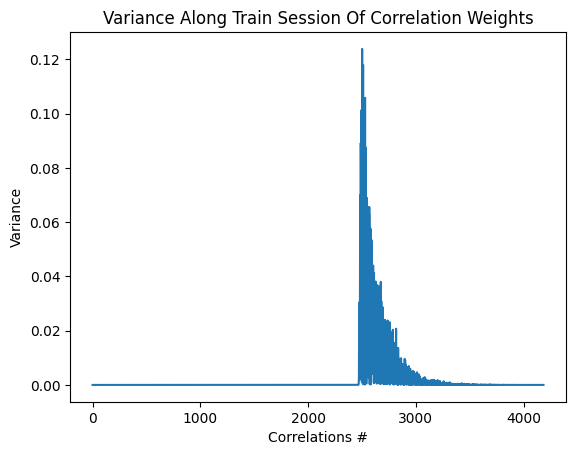

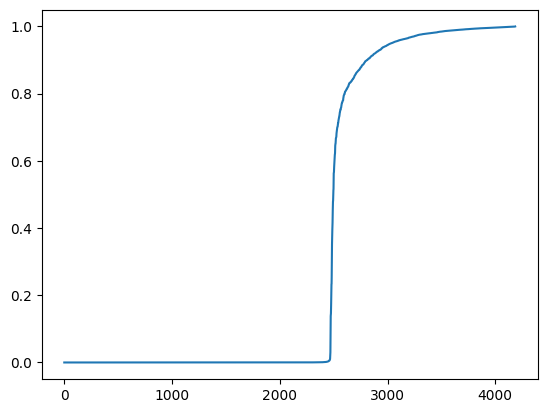

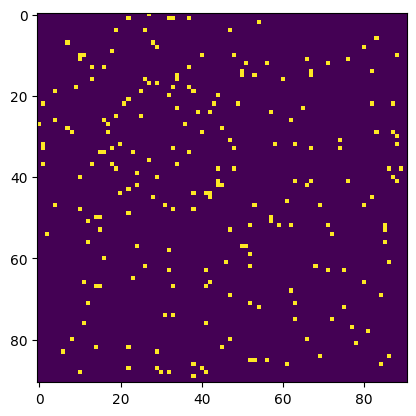

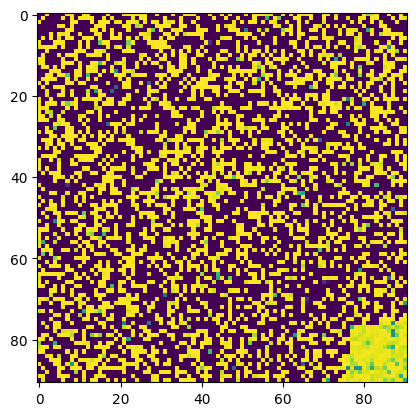

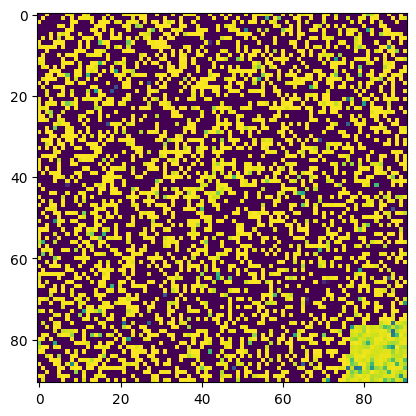

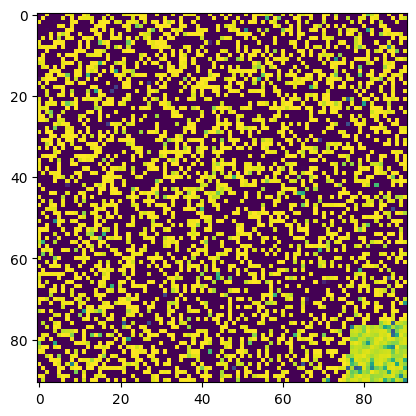

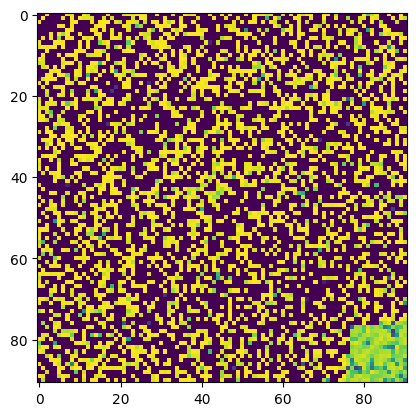

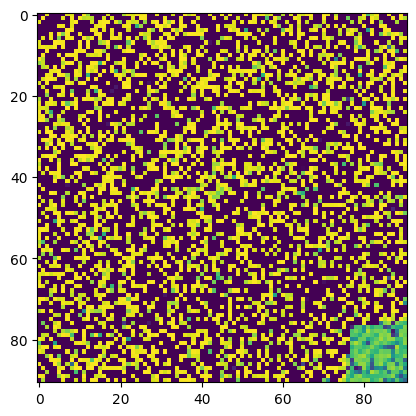

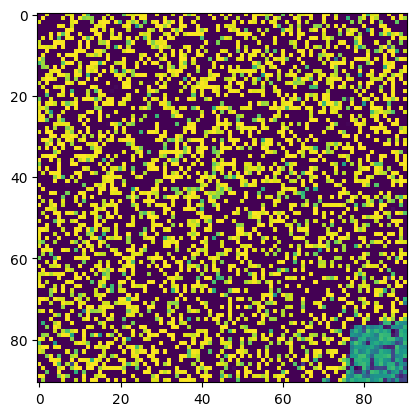

In [4]:
# Basic analysis
from numpy import argsort


mu_var = np.var(mus, axis=1)
sort_ids = np.argsort(np.mean(mus, axis=1))

plt.figure()
plt.plot(mu_var[sort_ids])

plt.title("Variance Along Train Session Of Correlation Weights")
plt.xlabel("Correlations #")
plt.ylabel("Variance")

plt.figure()
plt.plot(np.mean(mus, axis=1)[sort_ids])


mu_var[mu_var > 0.025] = 1
mu_var[mu_var < 0.025] = 0
mu_mean = np.mean(mus, axis=1)
mu_mean[mu_mean > 0.1] = 1
mu_mean[mu_mean < 0.1] = 0

plt.figure()
mu_matrix =  vector_to_symmetric_matrix(mu_var)
plt.imshow(mu_matrix)


sort_ids_mus = argsort(mu_var)
for session in range(0, 6):
    plt.figure()
    plt.imshow(vector_to_symmetric_matrix(mus[sort_ids_mus , session]))



IndexError: index 91 is out of bounds for axis 0 with size 91

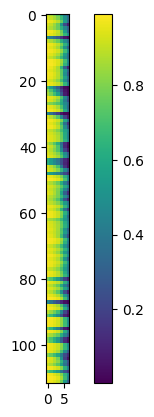

In [5]:
# Looking at the change of the correlations whose variance is greater
interest_mus = mus[mu_var == 1]

plt.figure()
plt.imshow(interest_mus)
plt.colorbar()

mu_var_matrix = vector_to_symmetric_matrix(mu_var)
mu_mean_matrix = vector_to_symmetric_matrix(mu_mean)

I =[]
J = []
I_y = np.zeros((mu_matrix.shape[0],1))
for jj in range(137):
    for ii in range(137):
        if mu_var_matrix[ii, jj] == 1:
            I.append(ii)
            J.append(jj)

I = np.sort(I)
J = np.sort(J)

plt.figure()
I_y[I] = 1
plt.plot(I_y)


In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assuming adjacency_matrix is a 2D numpy array from your dataset
# Let's generate a random binary matrix for demonstration purposes
adjacency_matrix = mu_var_matrix
# Create a graph
G = nx.Graph(adjacency_matrix)

# Simplify the network by removing nodes with all connections equal to zero
# And also by considering only a subset of the nodes if necessary
nodes_to_remove = [n for n, degree in dict(G.degree()).items() if degree == 0]
G.remove_nodes_from(nodes_to_remove)

# If the graph is still very dense, you might consider only taking a subset
# For example, the 50 nodes with the highest degree
# You can adjust this number as needed
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
top_node_ids = [n[0] for n in top_nodes]
subG = G.subgraph(top_node_ids)

# Increase figure size
plt.figure(figsize=(10, 10))

# Experiment with different layouts
# pos = nx.spring_layout(subG)  # A force-directed layout
pos = nx.kamada_kawai_layout(subG)  # Positions nodes using Kamada-Kawai path-length cost-function
# pos = nx.circular_layout(subG)  # Positions nodes in a circle

# Draw the network
nx.draw(subG, pos, with_labels=True, node_size=50, node_color='skyblue', edge_color='grey')

# Display the plot
plt.title('Simplified Subset Network of Important Neuron Relations')
plt.show()


NetworkXError: Failed to interpret array as an adjacency matrix.

In [ ]:
# Organize Corr Matrix

non_zero_row_indices = np.where(np.any(mu_var_matrix != 0, axis=1))[0]
non_zero_row_indices
non_zero_mean_indices = np.where(np.any(mu_mean_matrix != 0, axis=1))[0]

In [ ]:
# Save Data
path_them = 'C://Users//hadas-stud-group2//OneDrive - Technion\First Degree//Project A//results//'
path_my = 'C://Users//ariel//OneDrive - Technion\First Degree//Project A//results//'
path = path_my
save_data = {'important_mus':interest_mus, 'mus':mus, 'important_mus_order': np.where(mu_var == 1), 'mus_mean':mu_mean[mu_mean == 1], 
             'mu_mean_order':mu_mean == 1, 'neurons_indices':non_zero_row_indices, 'neurons_indices_mean': non_zero_mean_indices}
spio.savemat(os.path.join(path, 'processed_data.mat'), save_data)


(array([ 898, 1999, 2506, 2678, 2725, 3014, 3126, 3444, 3650, 3719, 3736,
        3783, 3842, 4020, 4087, 4537, 4563, 5013, 6150, 6261, 6372, 6788,
        7115, 7426, 7534, 8132, 8236, 8578, 8723, 8848, 8991, 9130],
       dtype=int64),)